# Flight Delay Data Exploration
## by Walid Naous

## Preliminary Wrangling

> This documents explore dataset containing flights information & delays for busiest month of the year July 2018 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('ontime_july_2018.csv')
airline_names = pd.read_csv('L_UNIQUE_CARRIERS.csv')
airline_names.info()
origin_names = pd.read_csv('L_AIRPORT.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 2 columns):
Code           1664 non-null object
Description    1665 non-null object
dtypes: object(2)
memory usage: 26.1+ KB


In [4]:
# high-level overview of data shape and composition
print(flights.shape)
print(flights.dtypes)
print(flights.head(10))

(645299, 17)
FL_DATE                   object
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN                    object
DEST                      object
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DEL15                float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY                float64
ARR_DEL15                float64
ARR_DELAY_GROUP          float64
dtype: object
   FL_DATE OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM  \
0   7/1/18                9E                  20363         9E   N927EV   
1   7/2/18                9E                  20363         9E   N820AY   
2   7/3/18                9E                  20363         9E   N8976E   
3   7/4/18                9E                  20363         9E   N8896A   
4   7/5/18                9E         

In [3]:
print(flights.describe())

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM   CRS_DEP_TIME       DEP_TIME  \
count          645299.000000      645299.000000  645299.000000  634782.000000   
mean            19982.720695        2545.699391    1334.020648    1337.691734   
std               374.223021        1818.710195     498.048666     518.030479   
min             19393.000000           1.000000       1.000000       1.000000   
25%             19790.000000        1008.000000     912.000000     911.000000   
50%             19977.000000        2122.000000    1325.000000    1326.000000   
75%             20368.000000        3936.000000    1742.000000    1754.000000   
max             20452.000000        7439.000000    2359.000000    2400.000000   

           DEP_DELAY      DEP_DEL15   CRS_ARR_TIME       ARR_TIME  \
count  634146.000000  634146.000000  645299.000000  634018.000000   
mean       13.628332       0.220468    1478.234528    1445.539753   
std        48.945389       0.414563     529.106865     559.5988

### Dataset Structure:

> There are about 650,000 recorded flight for the month of July in 2018. The data contains about 17 features covering the following: Arline Carrier ID, Flight time, Airport and city Destintion, Airport and city departure, Delay duration

### Main feature of interest in dataset:

> I am intrested in highlighting which airline with the most delay and what are the reasons contributing to the  delay

### Features in the dataset that support the investigation into the feature(s) of interest:

> I beleive weather to have the least causation of delay due to resonable clear summer weahter in July, flight time, location of departing airport and airline carier will have the most effect on flight delay.

## Univariate Exploration

> I will start looking at the number of delayed flight (Main variable) throughout the month of July

In [4]:
# Creating copy and Renaming Columns

df_flights = flights.copy()
#Drop unwanted columns
df_flights.drop(['OP_CARRIER','TAIL_NUM','ARR_DELAY_GROUP'],axis=1, inplace= True)
# Rename columns
df_flights.columns= ['date','carrier_code', 'carrier_id','flight_num','origin', 'dest', 'planned_dep_time', 'act_dep_time','dep_delay_duration','dep_delay_ind','planned_arr_time','act_arr_time','arr_delay','arr_delay_in']

df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645299 entries, 0 to 645298
Data columns (total 14 columns):
date                  645299 non-null object
carrier_code          645299 non-null object
carrier_id            645299 non-null int64
flight_num            645299 non-null int64
origin                645299 non-null object
dest                  645299 non-null object
planned_dep_time      645299 non-null int64
act_dep_time          634782 non-null float64
dep_delay_duration    634146 non-null float64
dep_delay_ind         634146 non-null float64
planned_arr_time      645299 non-null int64
act_arr_time          634018 non-null float64
arr_delay             631789 non-null float64
arr_delay_in          631789 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 68.9+ MB


In [5]:
# Cleaning the data by removing delay = 0 , ie non delay

df_flights = df_flights[(df_flights['dep_delay_duration'] != 0)]
df_flights.shape

(613961, 14)

In [18]:
# Replacing Carrier_code with airline names
df_flights['carrier_code']= df_flights['carrier_code'].map(airline_names.set_index('Code')['Description'])

In [59]:
df_flights.dep_delay_duration.describe()

count    602808.000000
mean         14.336824
std          50.100257
min         -47.000000
25%          -5.000000
50%          -2.000000
75%          12.000000
max        2710.000000
Name: dep_delay_duration, dtype: float64

## Departure Delay
Starting with the visual exploration, firstly I have plotted frequency of delay to get feel of how long is the delay duration in addition to its frequency of occurence.
>It is observed that the departing delay is right skewed with high number of delay between 0 and 12 minuts (within the 75% percentile). As result , this variable need to be trimmed to reduce outliers.

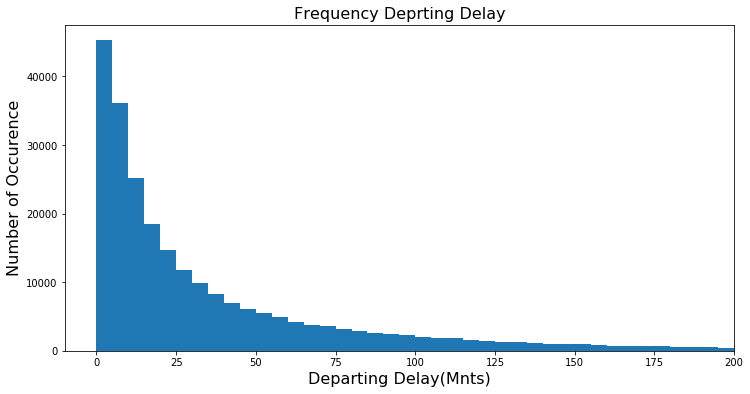

In [7]:
# Ploting the delay duration to review frequency

binsize = 5
bins = np.arange(0, df_flights['dep_delay_duration'].max()+binsize, binsize)
plt.figure(figsize=[12, 6])
plt.hist(data = df_flights, x = 'dep_delay_duration', bins = bins)
plt.xlim([-10,200])

plt.title('Frequency Deprting Delay' , fontsize = 16)
plt.xlabel('Departing Delay(Mnts)', fontsize = 16)
plt.ylabel('Number of Occurence', fontsize = 16)
plt.show()

## Carrier ID
The Predictable variable of 1st intrest is the airline ID : Carrier_code. The purpose of this visual representation is to understand which airline has the most occurence of delay and how do they compare to each other.
>It is observed that Southwest airline along with Delta Airline and American Airline are have the highest occurence of delay frequency. This findings, will guide us to further explore what correlation there is between the carrier and other variable in the dataset

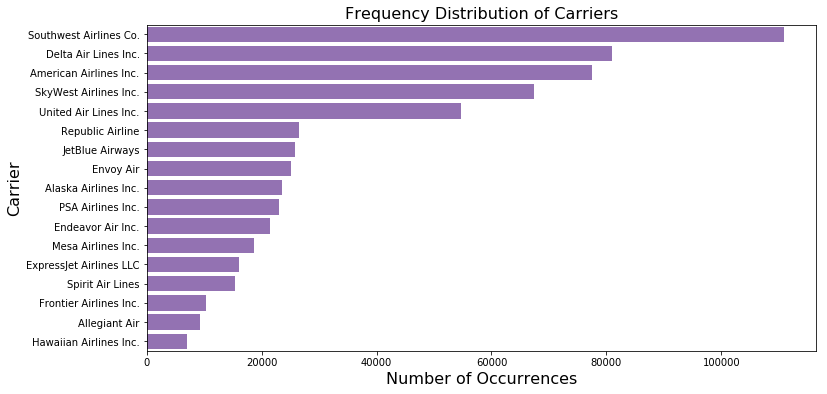

In [9]:
# Ploting cariiers delay frequency
plt.figure(figsize=(12, 6))
default_color = sn.color_palette()[4]
carrier_order = df_flights['carrier_code'].value_counts().index
sn.countplot(data=df_flights, y='carrier_code',color=default_color, order=carrier_order)

plt.title('Frequency Distribution of Carriers', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize=16)
plt.ylabel('Carrier', fontsize=16);

## ORIGIN AIRPORT

The third variable to investigate is the Origin airport. The reason of this visualization/exploration is to understand which airports have the most occurence of delay. The dataset has more than 350 airports that carriers have used during the month of July. For the benefit of our analysis, We will use top 50 airports associated with the highest number of Frequency in which flights are delayed.
>It is observed that Atlanta airport has the highest occurence of flight delay followed by Chicago airport and Dallas/FortWotrth. Moreover, it is also noted that there a drop between 1st and 2nd place all the to 6th place. After the 6th place, the ferequency of delay occurence decrease steadilty.

In [60]:
# Replacing Origin code with aorigin names
df_flights['origin']= df_flights['origin'].map(origin_names.set_index('Code')['Description'])

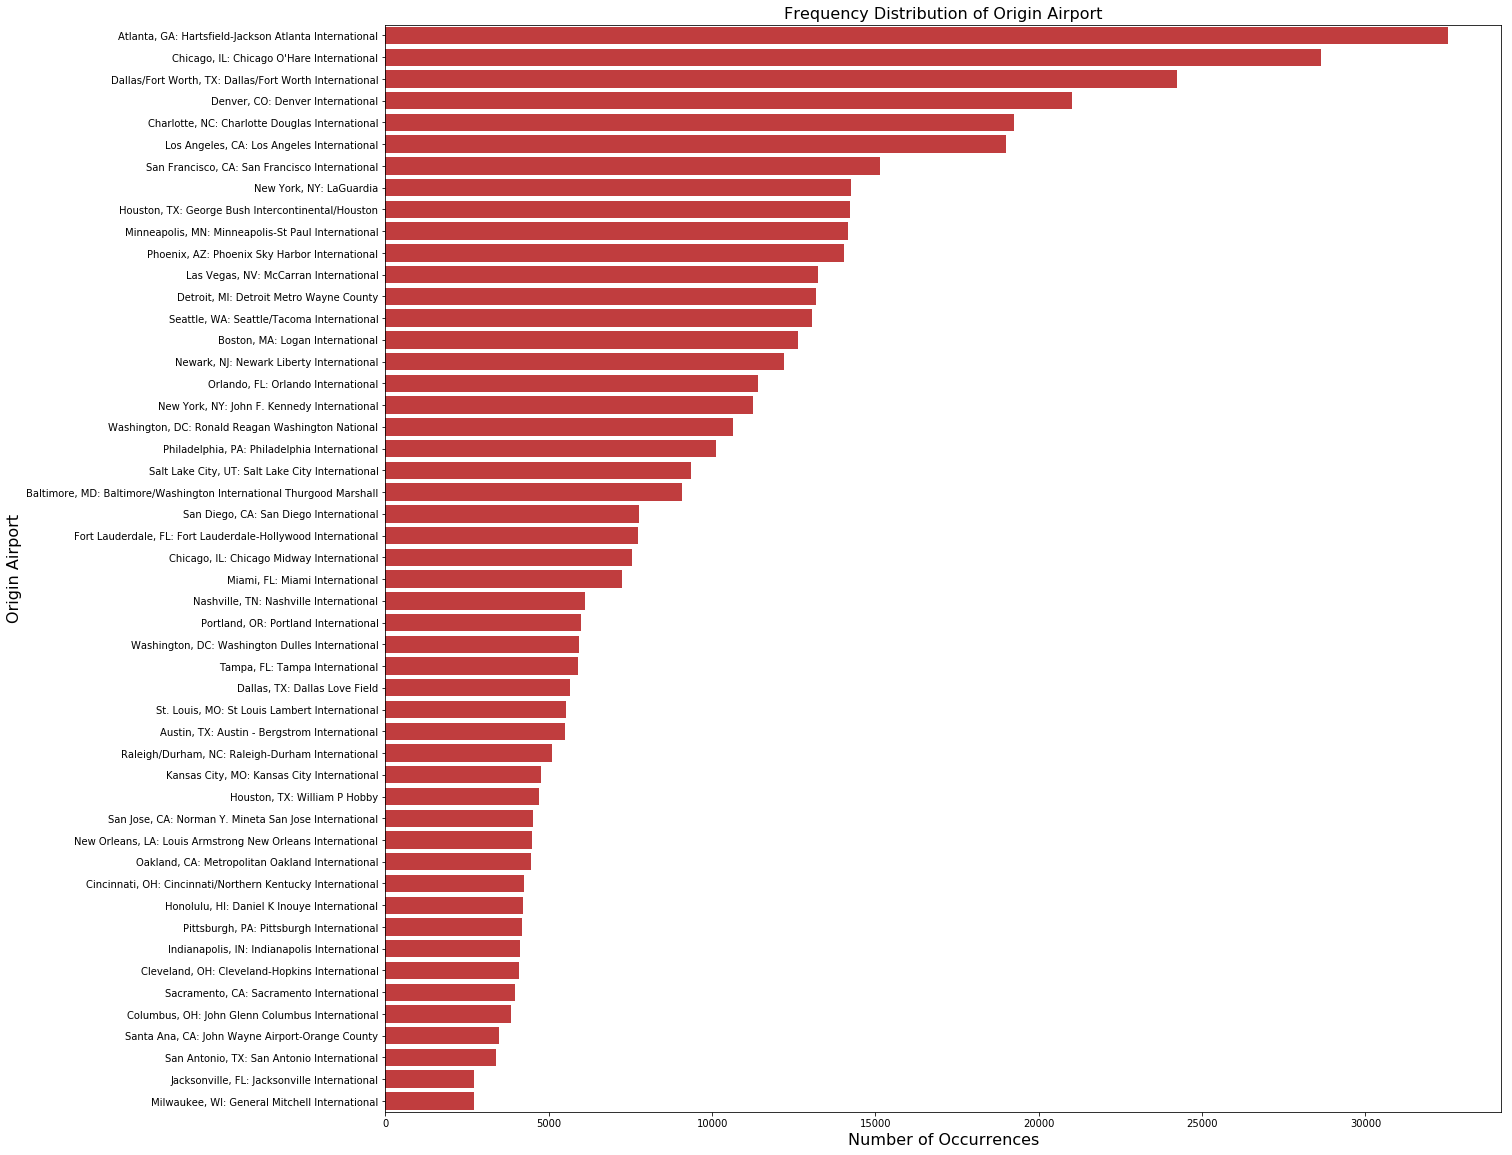

In [61]:
 #Select the Top 50 Airports for this analysis since there are more than 350 airports to work with which make the graph very crowded

default_color = sn.color_palette()[3]
carrier_order = df_flights['origin'].value_counts().head(50).index

plt.figure(figsize=(20, 20))

sn.countplot(data=df_flights, y='origin',color=default_color,order=carrier_order)


plt.title('Frequency Distribution of Origin Airport', fontsize = 16)
plt.xlabel('Number of Occurrences', fontsize=16)
plt.ylabel('Origin Airport', fontsize=16);



## Departing Time

Flight departure time is one of the most intresting variable to review and analyze in this dataset. Firstly the variable has been converted to time type and plotted in term of frequency of occurence.
>The outcome of the visualization indicate that there is quite common frequency of delay between 6 am and 6 pm throughout the day. In addition, the 6 am flight had shown the highest number of departure delay occurence.

In [8]:
#Convert planned departing time to date time
df_flights['planned_dep_time'] = df_flights['planned_dep_time'].apply(lambda x:int(str(x)[:2]) if x>999 else int(str(x)[:1] if x>99 else 0))

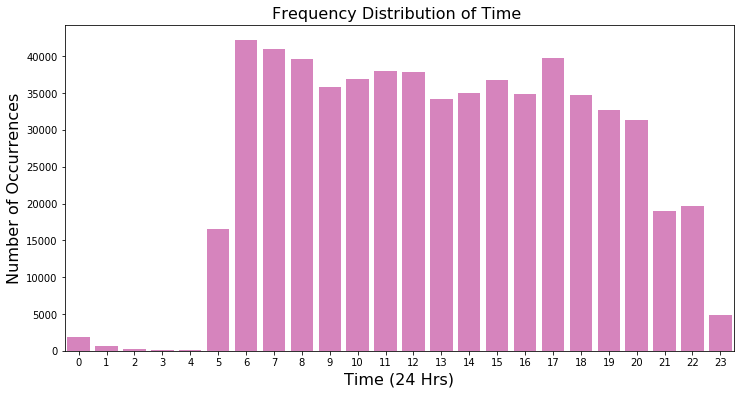

In [63]:

plt.figure(figsize=(12, 6))
default_color = sn.color_palette()[6]

carrier_count = df_flights['planned_dep_time'].value_counts()
sn.barplot(carrier_count.index, carrier_count.values, color = default_color)

plt.title('Frequency Distribution of Time ',fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Time (24 Hrs)', fontsize=16)
plt.show()

## Bivariate Exploration

In this section,  I will explore 2 variables via visualixation representation

### Carrier & Departure delay Duration

In the first Bivariate exploration I will look at the 2 variables of each carrier in connection to the duration of their flight departure delay. In other words, I will explore how many occurence each carrier had for a specific delay duration.

>The investigation of carrier vs delay duration, indicate that Sky West Airlines has the longest overall delays 
eventhough Southwest Airline have been found to have the most number of delays, those delay are shorter compared to other airlines such as Skywest, United Airline. Moreover, the median of departure "delay" seems to be negative indicating that flights have actualy took off ahead of time.

In [14]:
#Exploring delay duration range
df_flights['dep_delay_duration'].describe()

count    602808.000000
mean         14.336824
std          50.100257
min         -47.000000
25%          -5.000000
50%          -2.000000
75%          12.000000
max        2710.000000
Name: dep_delay_duration, dtype: float64

In [64]:
# Only select data between 25 and 75 percentile in order to remove outliers
df_flights_no_outliers = df_flights.loc[(df_flights.dep_delay_duration < df_flights.dep_delay_duration.quantile(0.75)) &
                           (df_flights.dep_delay_duration > df_flights.dep_delay_duration.quantile(0.25))].copy()


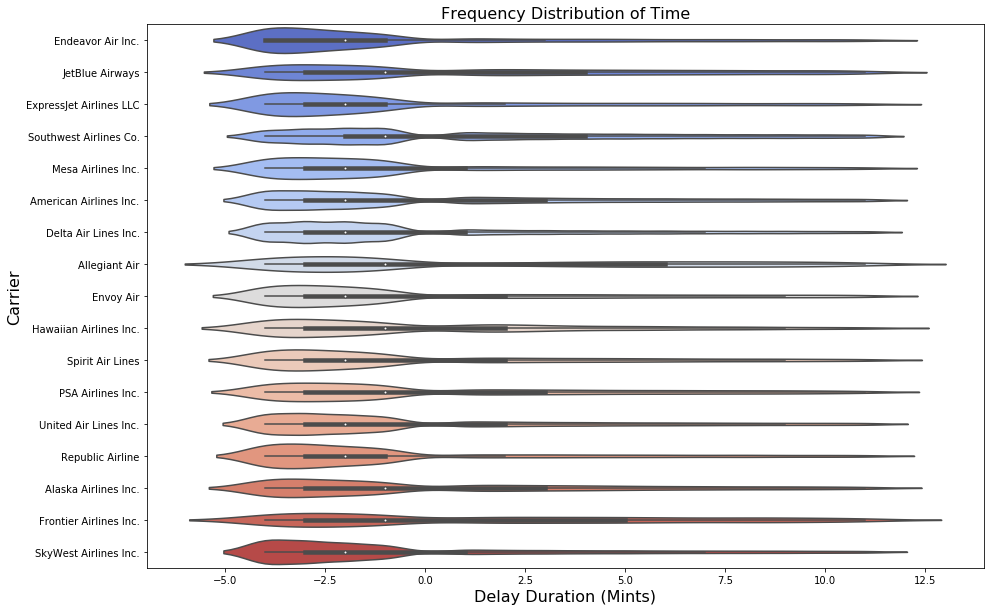

In [66]:
#Create strip plot in seaborn violinplot for Carrier Vs Delay duration 
plt.figure(figsize=(15, 10))

sn.violinplot(y= "carrier_code", x= "dep_delay_duration", data=df_flights_no_outliers,palette="coolwarm")

plt.title('Frequency Distribution of Time' , fontsize=16)
plt.ylabel('Carrier', fontsize=16)
plt.xlabel('Delay Duration (Mints)', fontsize=16)

plt.show()

### Carrier & Time of departure

The second exploration of date is between carriers and time of flight departure. This will help further understand if certain airlines have better departure delay based on the time fo the day their flight is taking off.
> It is observed from the produced visualization that the airline with most delay frequency such as South West airline have a mean of departure time about 11 am and its 25% percentile about 9 am, which is not associated with the highest occurence of flight delay time (6:00 am) as found in previous visualition ("Frequency Distribution of Time"). All other aircraft have their mean departure time between 11:00 am and 1:00 pm

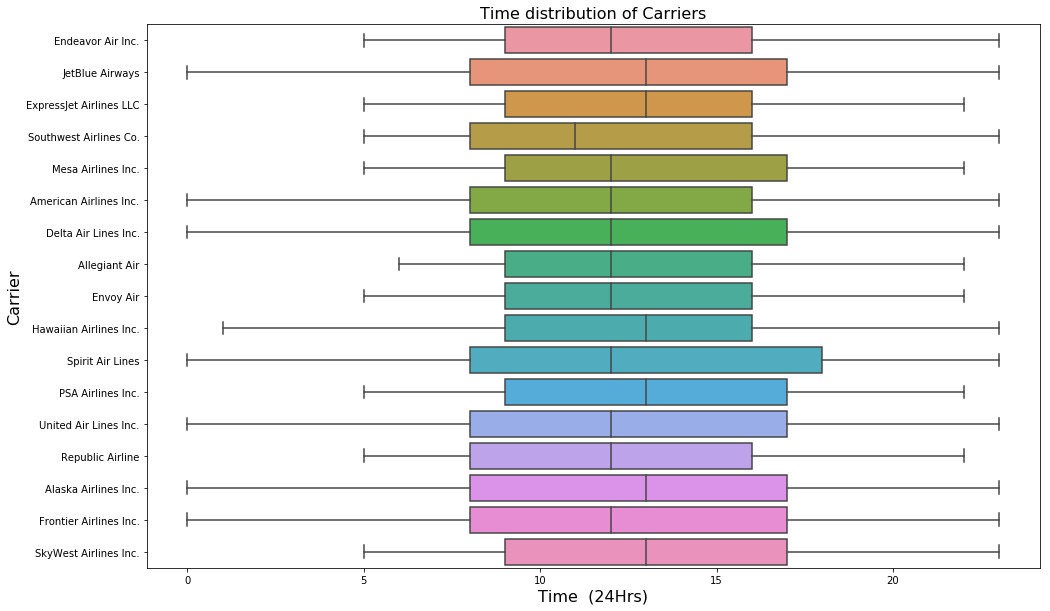

In [70]:
#Create strip plot in seaborn violinplot for Carrier Vs Time of Flight
plt.figure(figsize=(16, 10))

sn.boxplot(data=df_flights_no_outliers, y= "carrier_code", x= "planned_dep_time")

plt.title('Time distribution of Carriers' , fontsize=16)
plt.xlabel('Time  (24Hrs)', fontsize=16)
plt.ylabel('Carrier', fontsize=16)

plt.show()

### Departure Vs Arrival Delay

The third bivariate exploration is between Depoarture take off delay vs Arrival delay. In this instance I will review how the arrival delay is related to take off delay.
> It is observed that there is a wide spread for each departure delay duration vs arrival dealy duration. This visualization can provide the information that as departure delay duration increase arrival delay duration ditribution seems to slightly increase. Therefore, Departing late within 10 minutes does not seem to effect on arrival delay. In addition, weather and air traffice might have better correlation with arrival delay

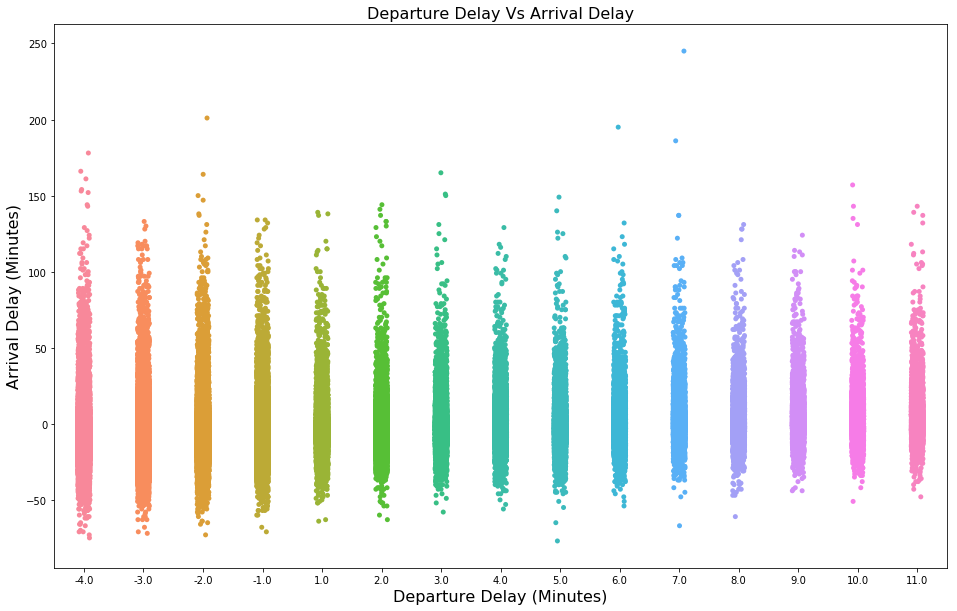

In [73]:
#Create strip plot in seaborn  for Departure Departure Vs Arrival Delay
plt.figure(figsize=(16, 10))

#sn.boxplot(data=df_flights_no_outliers, x= "carrier_code", y= "origin")
sn.stripplot(data=df_flights_no_outliers, y="arr_delay", x="dep_delay_duration" )

plt.title('Departure Delay Vs Arrival Delay' , fontsize=16)
plt.xlabel('Departure Delay (Minutes)', fontsize=16)
plt.ylabel('Arrival Delay (Minutes)', fontsize=16)

plt.show()

## Multivariate Exploration


### Carrier - Departure Time - Departure Delay Duration

Multivariate plot will be create to explore how each carrier departure duration is related to the departure time. As seen in the plot previously ("Time distribution of Carriers"), Southwest airline had a mean dearture time at 11 am and it was the highest airline with departure delay.
> A very intresting observation that confirm the above. For instance Southwest Airlines duration of departure delay seems to increase as day progress, first peaking at about 11 am. This translate to departure delay increase of about 3 minutes between 5:00 and 11:00 am. In general it has been observed that airline are departing not later than 4 minutes on average from planned take offe time.

/Users/Walz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

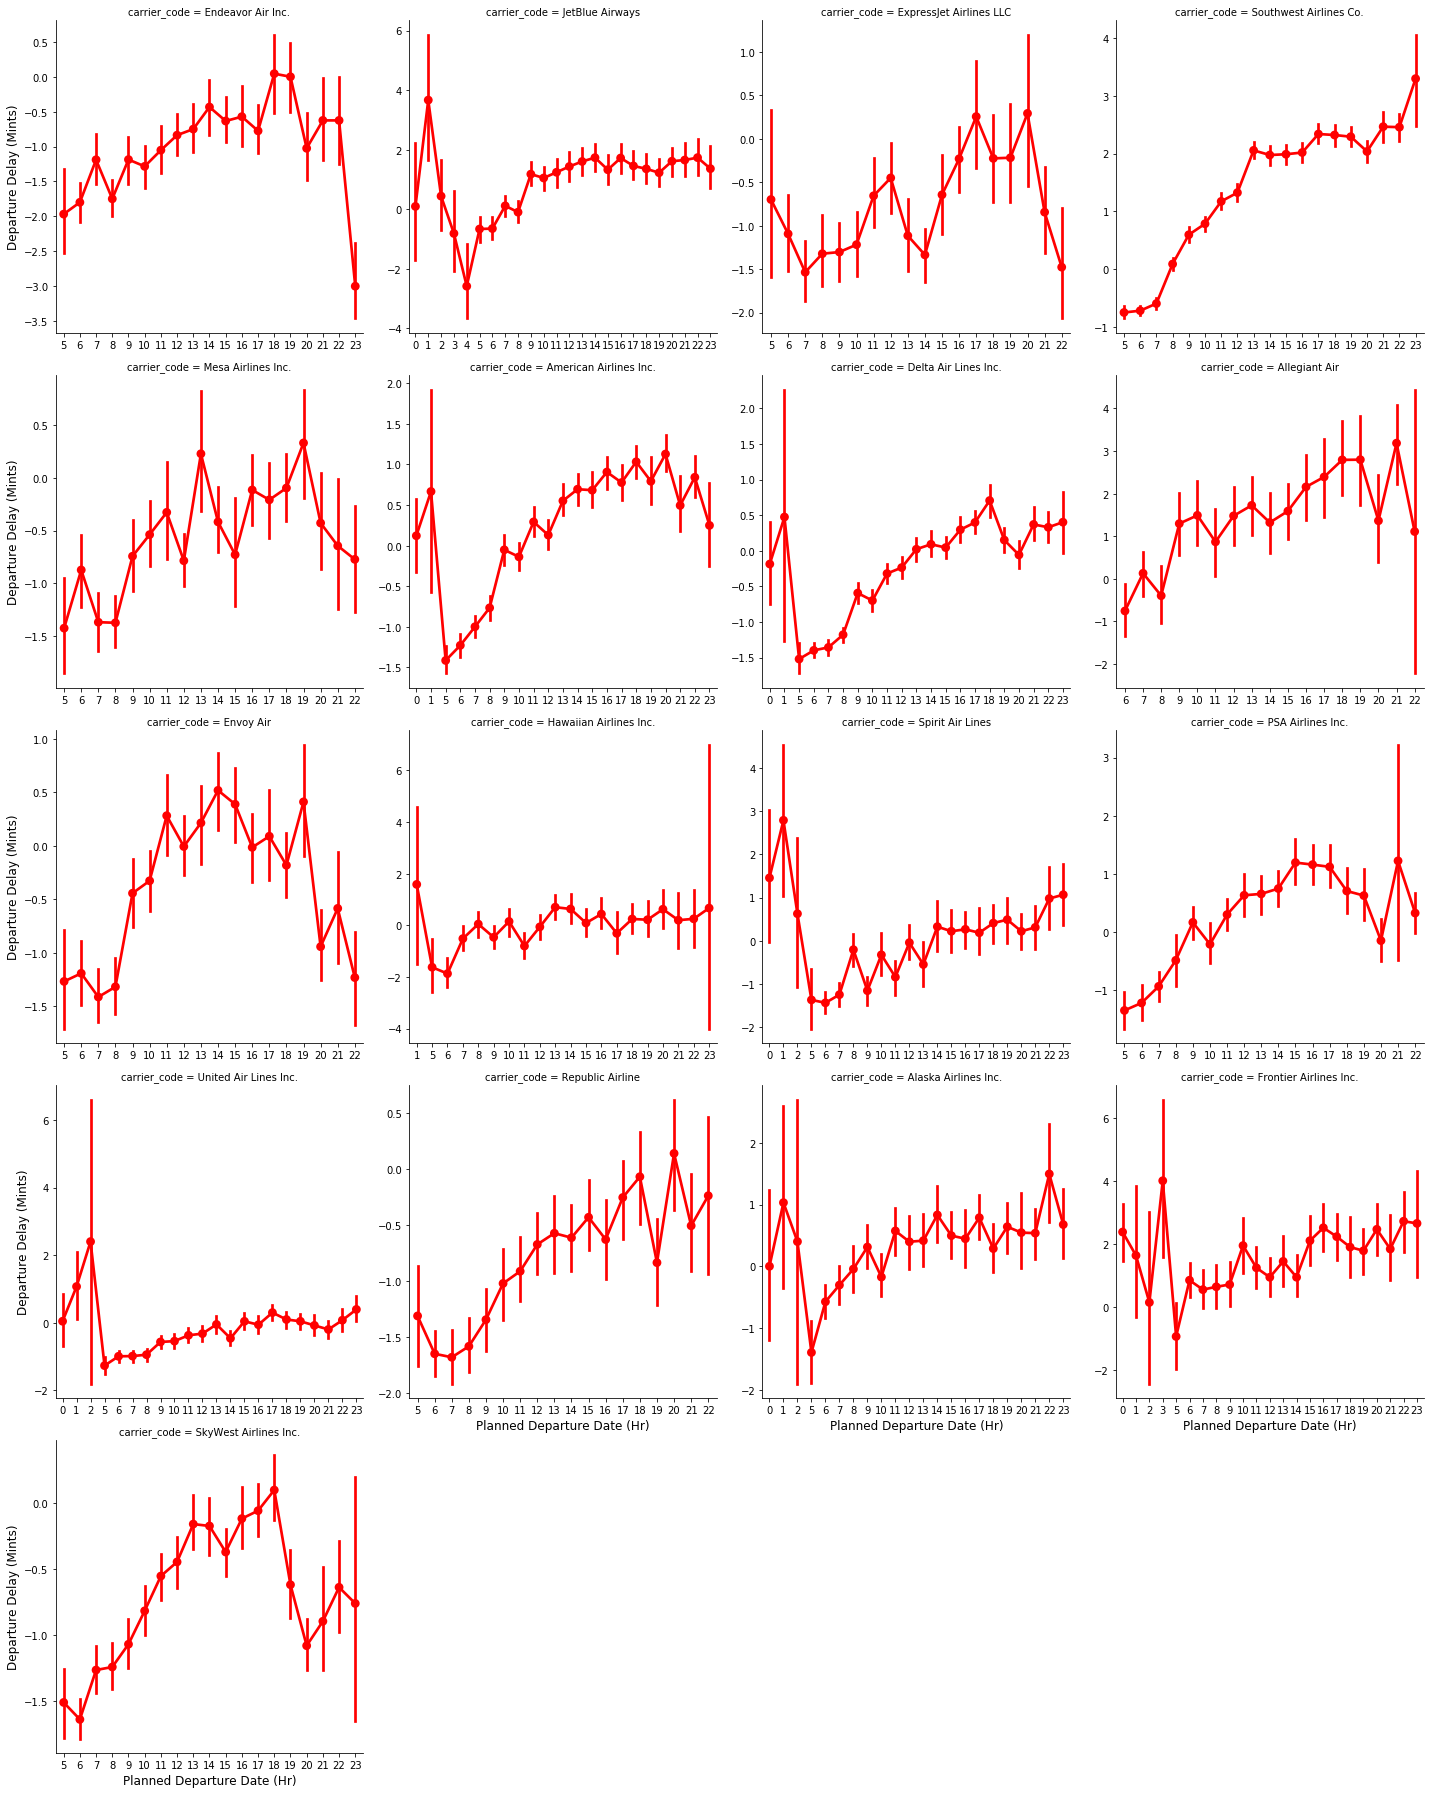

In [76]:
plt.figure(figsize=[14.70, 8.27])

g = sn.FacetGrid( data=df_flights_no_outliers, col='carrier_code',margin_titles=True,sharex=False,sharey=False,col_wrap=4,height = 5, aspect =1)
g.map(sn.pointplot,'planned_dep_time','dep_delay_duration', marker=".", color="r") 

g.set_xlabels('Planned Departure Date (Hr)',fontsize = 12)
g.set_ylabels('Departure Delay (Mints)',fontsize = 12)

g.add_legend();

### Carrier - Date - Departure Delay Duration
The second Multivariate plot will be to explore how each carrier departure duration is related to the date of the month . The reason of this visualization is to understand if carriers perform better or worse on particualre day of the month
>The results show a steady performance throughout the month of all major airlines, there was not apparent trend that departure delay of airline improve as the month progress.


/Users/Walz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1058.4x595.44 with 0 Axes>

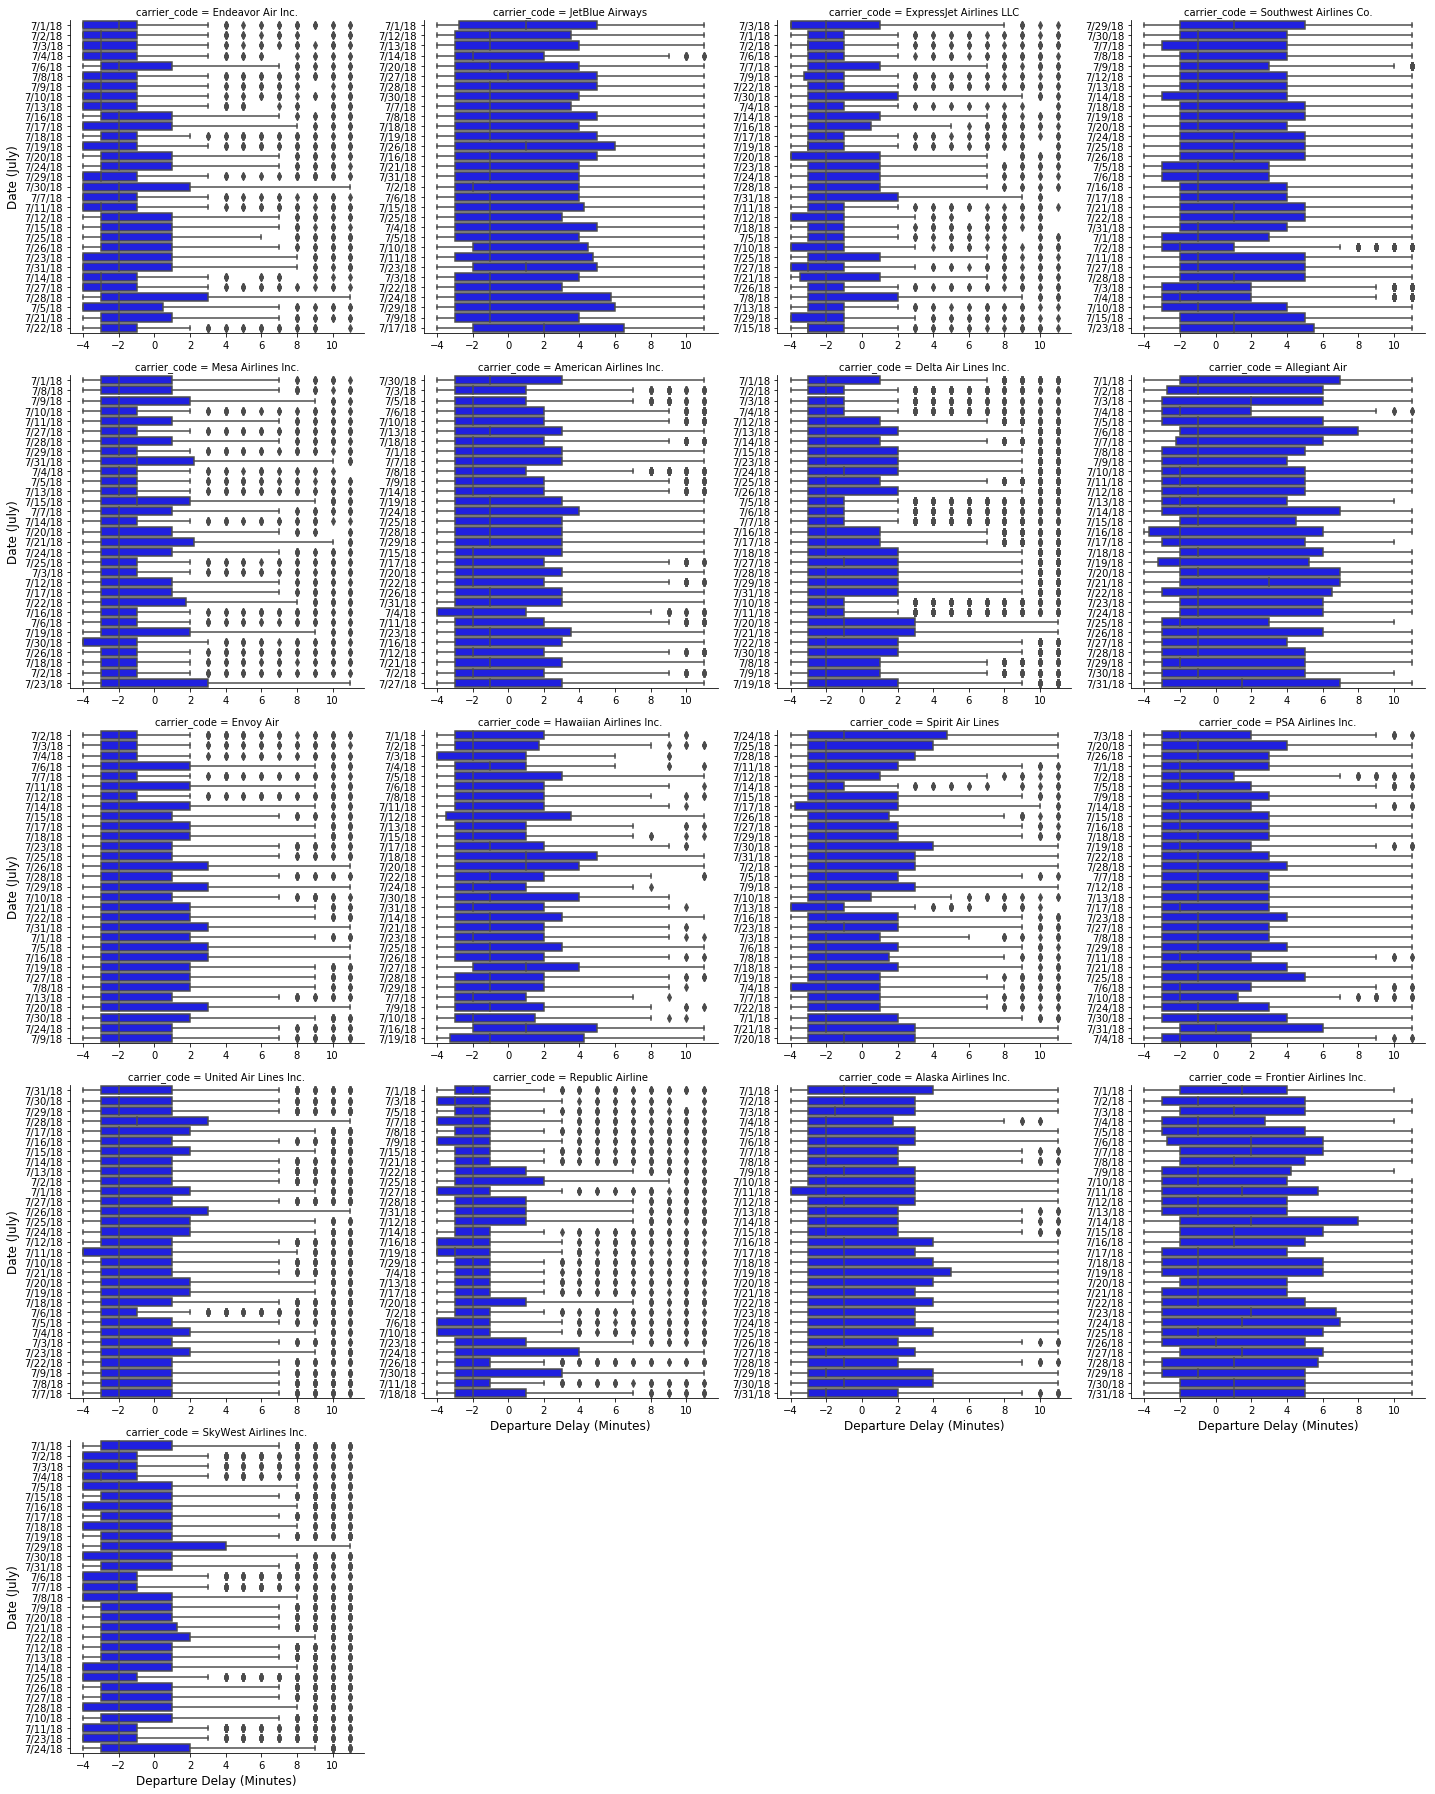

In [82]:
plt.figure(figsize=[14.70, 8.27])

g = sn.FacetGrid(data = df_flights_no_outliers, col = 'carrier_code',margin_titles=True,sharex=False,sharey=False,col_wrap=4, height = 5, aspect =1)
g.map(sn.boxplot,'dep_delay_duration','date', color='b' )

g.set_xlabels('Departure Delay (Minutes)',fontsize = 12)
g.set_ylabels('Date (July)',fontsize = 12)

